In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
dset = pd.read_csv("Untitled spreadsheet - Sheet1.csv")

In [3]:
dset.head()

,Player,MP,Starts,Min,90s,Gls,Ast,Gls.1,Ast.1
0,Amrinder Singh,15,15,"1,350",15.0,0,0,0.00,0.00
1,Amey Ranawade,15,15,"1,307",14.5,1,4,0.07,0.28
2,Isak Vanlalruatfela,15,15,"1,241",13.8,2,3,0.15,0.22
3,Jerry Lalrinzuala,14,14,"1,253",13.9,0,0,0.00,0.00
4,Ahmed Jahouh,14,14,"1,226",13.6,2,2,0.15,0.15


In [4]:
dset

,Player,MP,Starts,Min,90s,Gls,Ast,Gls.1,Ast.1
0,Amrinder Singh,15,15,"1,350",15.0,0,0,0.00,0.00
1,Amey Ranawade,15,15,"1,307",14.5,1,4,0.07,0.28
2,Isak Vanlalruatfela,15,15,"1,241",13.8,2,3,0.15,0.22
3,Jerry Lalrinzuala,14,14,"1,253",13.9,0,0,0.00,0.00
4,Ahmed Jahouh,14,14,"1,226",13.6,2,2,0.15,0.15
5,K Lalthathanga,14,14,"1,165",12.9,1,1,0.08,0.08
6,Carlos Delgado,15,13,"1,202",13.4,0,1,0.00,0.07
7,Roy Krishna,15,11,974,10.8,11,1,1.02,0.09
8,Diego Maurício,14,9,770,8.6,6,1,0.70,0.12
9,Narender Gahlot,10,9,741,8.2,0,0,0.00,0.00


In [5]:
dset = dset.drop(["Player","Starts","90s","Gls.1","Ast.1"],axis=1)

In [6]:
dset.info()
a = dset['Min']
for i in range(len(a)):
    a[i]  = a[i].replace(",", "")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MP      28 non-null     int64 
 1   Min     28 non-null     object
 2   Gls     28 non-null     int64 
 3   Ast     28 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.0+ KB


C:\Users\KIRAN\AppData\Local\Temp\ipykernel_20332\1174509567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[i]  = a[i].replace(",", "")
C:\Users\KIRAN\AppData\Local\Temp\ipykernel_20332\1174509567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[i]  = a[i].replace(",", "")
C:\Users\KIRAN\AppData\Local\Temp\ipykernel_20332\1174509567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[i]  = a[i].replace(",", "")
C:\Users\K

In [7]:
dset = dset.astype({
    'Min': float,
    'Gls': float,
    'Ast':float
})

In [8]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MP      28 non-null     int64  
 1   Min     28 non-null     float64
 2   Gls     28 non-null     float64
 3   Ast     28 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.0 KB


# DATA CLEANED
Now i am going to apply k mean algorithm to cluster these 28 players /////

In [9]:
dset = (dset - dset.min())/(dset.max()-dset.min())* 9 +1

# Finding the centroid

In [10]:
def random_centroid(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x:float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)

In [12]:
data = random_centroid(dset, 3)
print(data)

       0          1     2
MP   1.0  10.000000  2.80
Min  1.0   9.273333  3.26
Gls  1.0   1.000000  1.00
Ast  1.0   1.000000  1.00


C:\Users\KIRAN\AppData\Local\Temp\ipykernel_20332\3385832708.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x:float(x.sample()))


# Finding the distance

In [14]:
dist = data.apply(lambda x:np.sqrt(((dset-x)**2).sum(axis=1)))
print(dist)


            0          1          2
0   12.727922   0.726667   9.862434
1   15.446411   9.047819  13.234611
2   14.060165   6.945516  11.672205
3   11.846442   0.605310   8.982690
4   12.660611   4.826768  10.072497
5   11.688158   2.519649   8.922741
6   12.258712   2.264972   9.487009
7   14.464642   9.446211  12.482933
8   11.228214   6.275450   8.998762
9    7.771975   4.484541   4.982208
10   8.730784   5.344551   6.341339
11   9.315688   3.398882   6.635343
12   7.956610   5.331078   5.403977
13   7.276083   8.036445   5.474198
14   7.330082   6.854391   5.301179
15   6.849899   6.872671   4.818926
16   4.950977   8.214840   3.177343
17   2.525637   9.980490   1.590821
18   1.919491  10.473843   1.593333
19   1.810353  10.822495   2.066667
20   0.605310  11.734169   2.488453
21   0.605310  11.734169   2.488453
22   1.202239  11.317243   2.267490
23   0.602993  11.748142   2.505993
24   0.000000  12.224894   2.889221
25   0.000000  12.224894   2.889221
26   0.000000  12.224894   2

# ELBOW METHOD
In the second step, we will try to find the optimal number of clusters for our clustering problem. So, as discussed above, here we are going to use the elbow method for this purpose.

As we know, the elbow method uses the WCSS concept to draw the plot by plotting WCSS values on the Y-axis and the number of clusters on the X-axis. So we are going to calculate the value for WCSS for different k values ranging from 1 to 10. Below is the code for it:

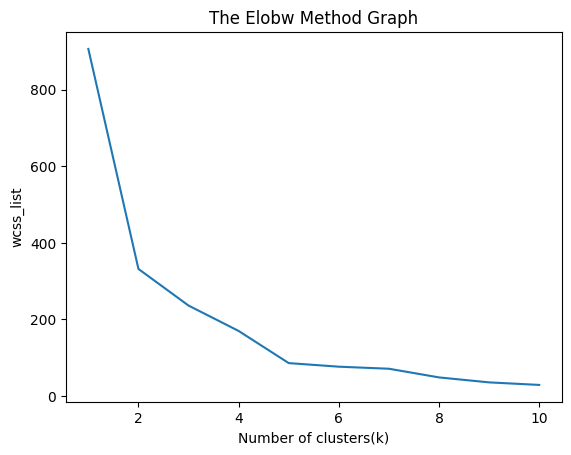

In [15]:
x = np.array(dset)
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
 
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [20]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x) 

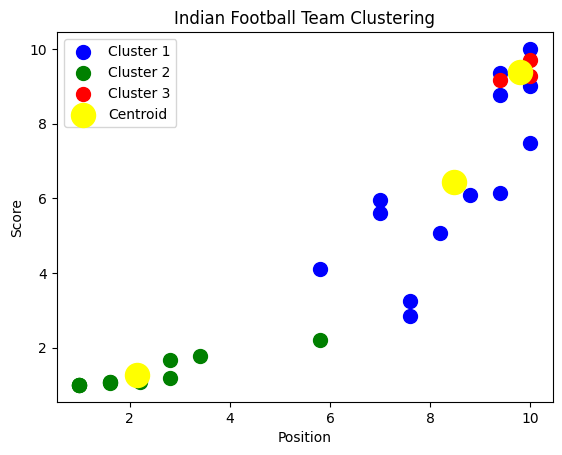

In [21]:
#visulaizing the clusters  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
#plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Indian Football Team Clustering')  
plt.xlabel('Position')  
plt.ylabel('Score')  
plt.legend()  
plt.show()  